# Binary black hole detections

Matriculation: 2663452m

## Aims
The aims of this experiment are to procees the gravitational wave data from the first and second runs of the LIGO/Virgo gravitational wave detectors and to discover properties of the binary black hole systems that prodiced the signals.


Gravitational waves were first predicted by Einstien in his 1915 paper on General Relativity but in 2015 the first gravitational wave was detected by the LIGO research group.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
import scipy.optimize as opt
import scipy.constants as const
import os
import lal as lal
from scipy.signal import spectrogram
import gw_detections_functions as gw
import pandas as pd

all_title = 18
title_size = 16
axis_size = 12
plt.rcParams["font.family"] = "Times New Roman"


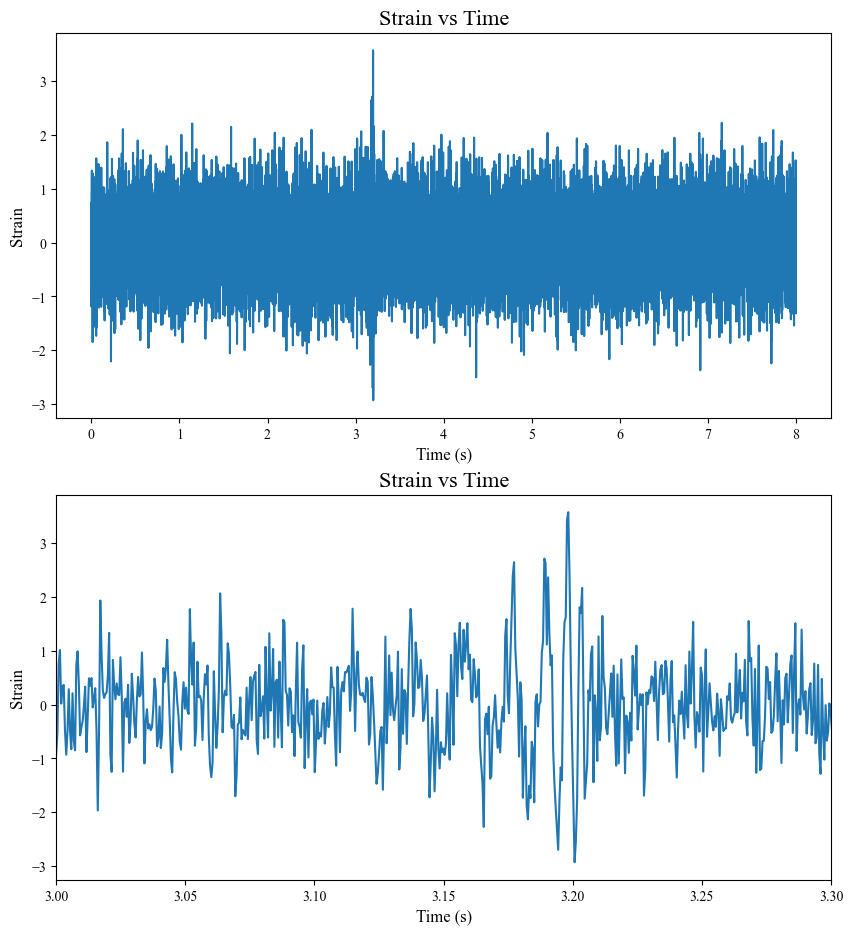

In [65]:
data = np.loadtxt('strain_data/GW150914_strain.txt')
time = data[:,0]
strain = data[:,1]

plt.figure(figsize = (10,11))
plt.subplot(2,1,1)
plt.plot(time, strain)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('Strain', fontsize=axis_size)
plt.title('Strain vs Time', fontsize=title_size)

plt.subplot(2,1,2)
plt.plot(time, strain)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('Strain', fontsize=axis_size)
plt.title('Strain vs Time', fontsize=title_size)
plt.xlim(3,3.3)
plt.show()

The siganl shows a peak in the strain likely as the black holes collide releasing a lot of energy in a short amount of time.

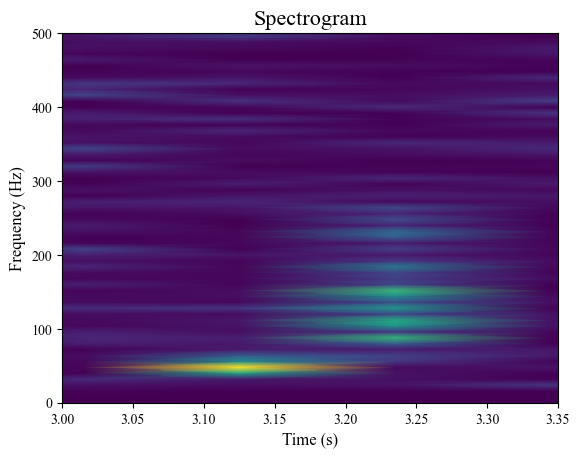

In [66]:
spec_f, spec_t, spec = sp.signal.spectrogram(strain, 2048)
plt.pcolormesh(spec_t, spec_f, spec, shading='gouraud')
plt.ylabel('Frequency (Hz)', fontsize=axis_size)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.xlim(3,3.35)
plt.ylim(0,500)
plt.title('Spectrogram', fontsize=title_size)
plt.show()


reasonable mass of a black hole in merger 7 - 37 solar masses

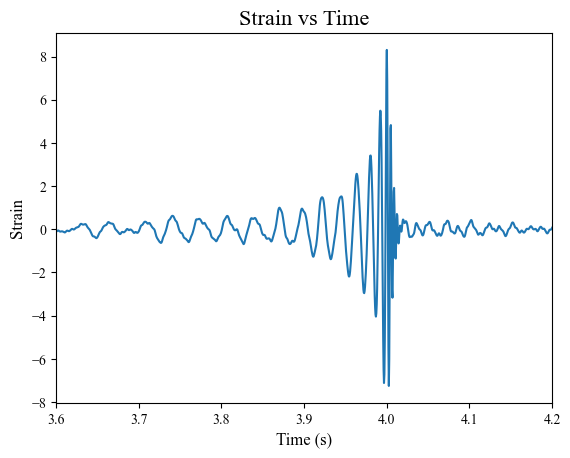

In [67]:
inv_psd = np.loadtxt('inv_psd/GW150914_inv_psd.txt',usecols=(1,))
t, template = gw.make_template(36,31,2048,8,inv_psd,400)

plt.figure()
plt.plot(t, template)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.xlim(3.6,4.2)
plt.ylabel('Strain', fontsize=axis_size)
plt.title('Strain vs Time', fontsize=title_size)
plt.show()


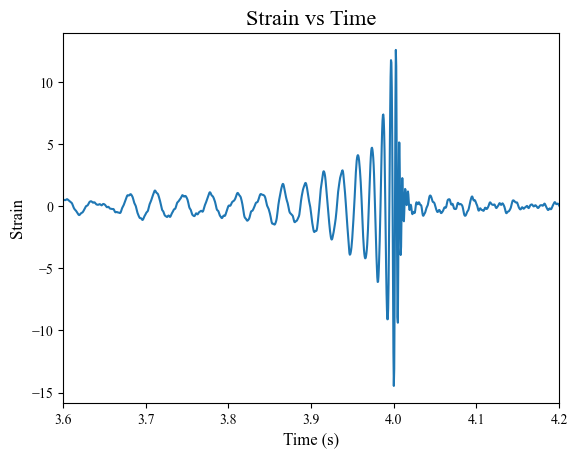

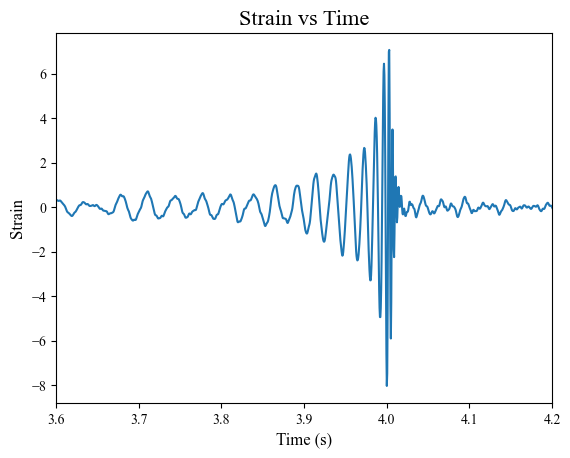

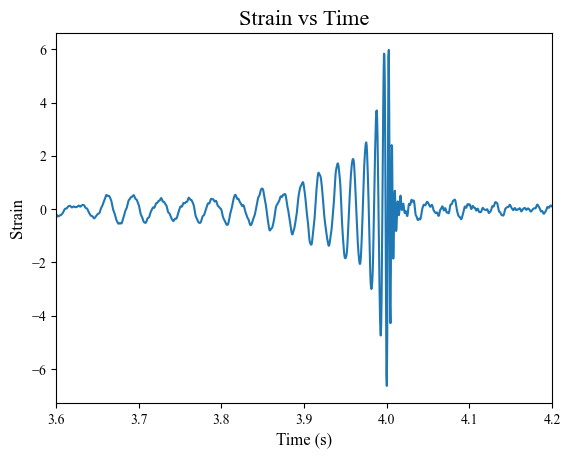

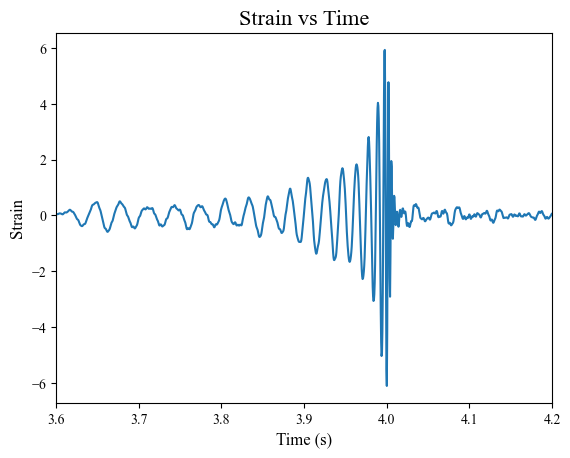

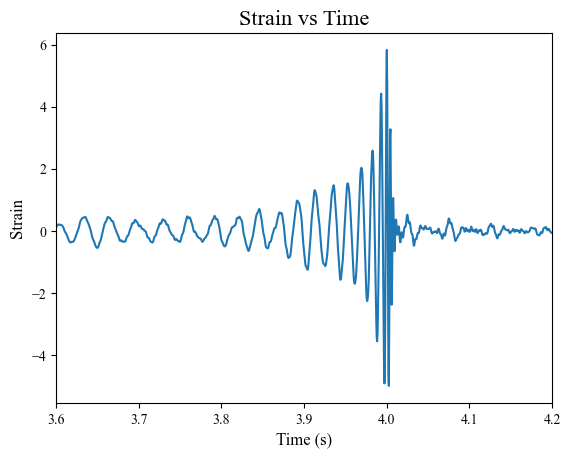

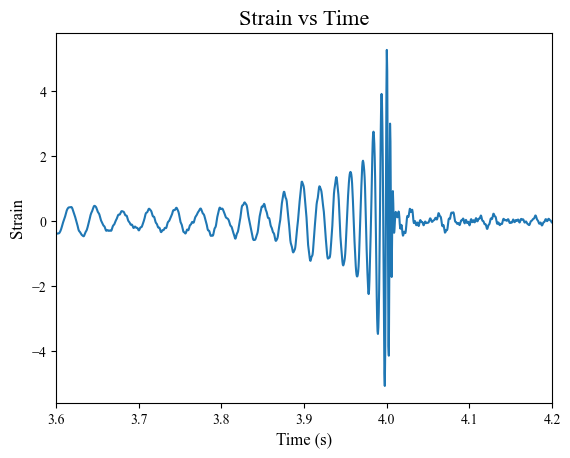

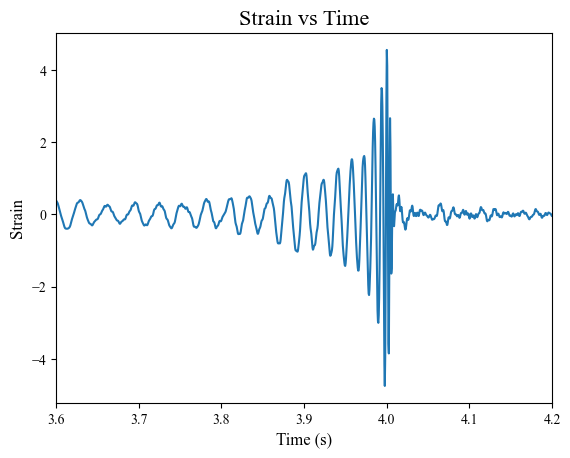

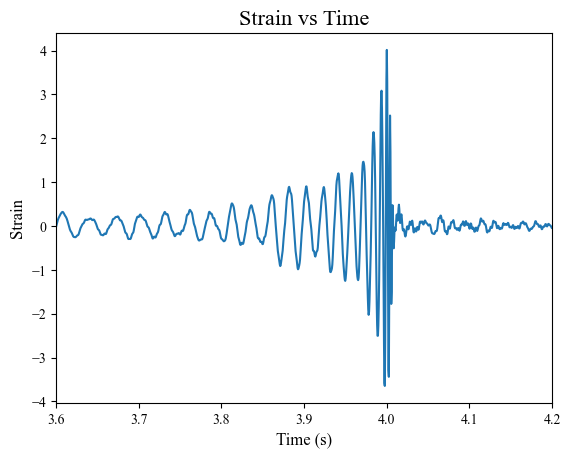

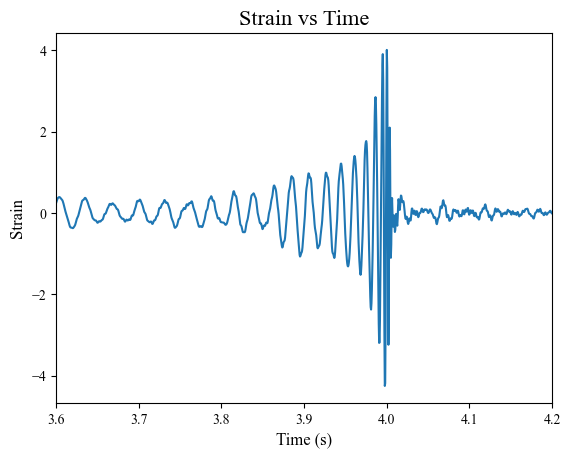

In [68]:
mass_one = [37,38,36,35,34,33,32,31,25]
mass_two = [24,23,22,21,20,19,18,17,24]
mass_three = np.array(mass_one) - 1
distance = [400,500,350,450,430,510,390,200,420]
distance = np.sort(np.array(distance))
for i in range(len(mass_one)):
        t, template = gw.make_template(mass_one[i],mass_two[i],2048,8,inv_psd,distance[i])
        plt.figure()
        plt.plot(t, template)
        plt.xlabel('Time (s)', fontsize=axis_size)
        plt.xlim(3.6,4.2)
        plt.ylabel('Strain', fontsize=axis_size)
        plt.title('Strain vs Time', fontsize=title_size)
        plt.show()



# Task 2

As distance increases the amplitude of the wave decreases.
not much changes for masses that are simlar or different

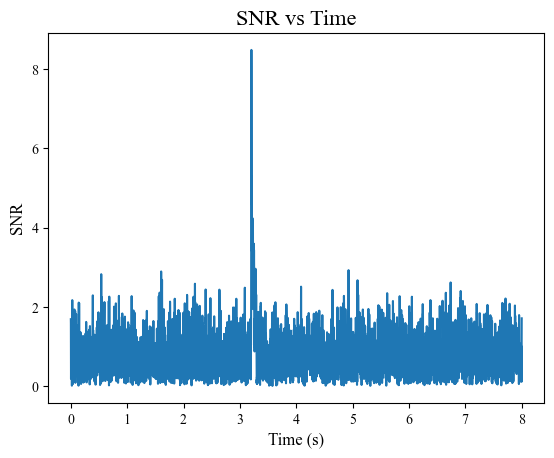

8.482283713317145
(array([6561]),)
[8.48228371] [3.20361328]


In [69]:
snr_ts = gw.get_snr(strain, template, 2048)
plt.figure()
plt.plot(time,snr_ts)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('SNR', fontsize=axis_size)
plt.title('SNR vs Time', fontsize=title_size)

plt.show()
print(np.max(snr_ts))
print(np.where(np.max(snr_ts) == snr_ts))
print(snr_ts[np.where(np.max(snr_ts) == snr_ts)],time[np.where(np.max(snr_ts) == snr_ts)])

min_time = time[np.where(np.max(snr_ts) == snr_ts)]-0.05
max_time = time[np.where(np.max(snr_ts) == snr_ts)]+0.05


### Part a

13.817943693057638 38.94736842105264 34.8421052631579


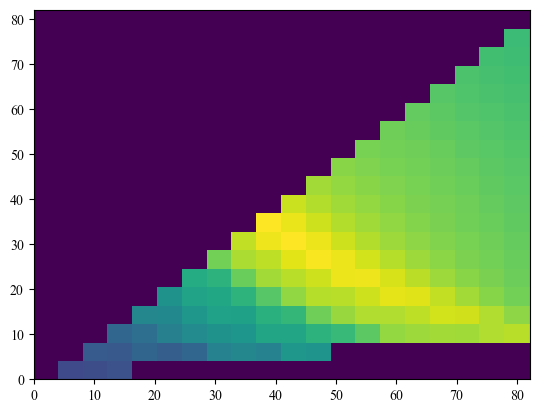

13.826971256612358 37.10526315789474 35.26315789473684


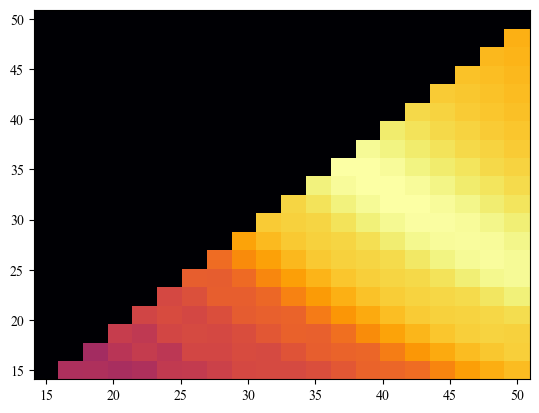

In [70]:
masses = np.linspace(2,80,20)
currentmax = 0
highest_snr = [[0 for x in range(13)] for y in range(13)]
mass1 = [] 
mass2 = [] 
allsnr = []

for m1 in masses:
    for m2 in masses:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
            snr_ts = gw.get_snr(strain, template, 2048)
            maxsnr = np.max(snr_ts)
            allsnr.append(maxsnr)
            if maxsnr > currentmax:
                currentmax = maxsnr
                M1 = m1
                M2 = m2
        else:
            allsnr.append(0)
print(currentmax, M1, M2)

reshaped = (np.reshape(allsnr, (20,20)).T)
plt.figure()
plt.pcolor(masses, masses, reshaped)
plt.show()

allsnr2 = []
currentmax = 0
masses2 = np.linspace(15,50,20)
maxsnr = []
for m1 in masses2:
    for m2 in masses2:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd)
            snr_ts = gw.get_snr(strain, template, 2048)
            maxsnr = np.max(snr_ts)
            allsnr2.append(maxsnr)
            if maxsnr > currentmax:
                currentmax = maxsnr
                M1 = m1
                M2 = m2
        else:
            allsnr2.append(0)
print(currentmax, M1, M2)



reshaped = (np.reshape(allsnr2, (20,20)).T)
plt.figure()
plt.pcolor(masses2, masses2, reshaped, cmap='inferno')
plt.show()

Best fit mass pair for snr result is 36,35 solar masses

### Part b

/var/folders/tn/fqh6631n3p56r504tcsqvss00000gn/T/ipykernel_16821/3238044459.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p0 = np.array([1000,time[(np.where(np.max(snr_ts) == snr_ts),)],0.5])
/var/folders/tn/fqh6631n3p56r504tcsqvss00000gn/T/ipykernel_16821/3238044459.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  popt, pcov = curve_fit(make_signal,time ,strain, p0 = np.array([1000,time[(np.where(np.max(snr_ts) == snr_ts),)],0.5]),bounds = b, sigma=ht_err, absolute_sigma=True)


The errors for distance, time, and phase are 84.55085979022154, 0.00019289809232590327, and 0.1592501676838028 respectively.
The best fit parameters for distance, time, and phase are 1151.1513129536315, 3.1977281585687707, and 5.69828940481586e-16 respectively.


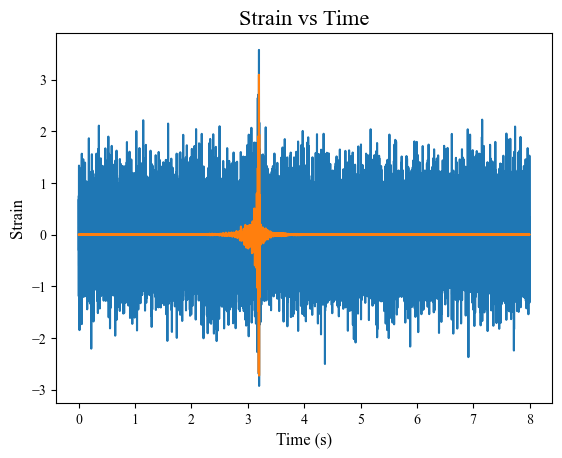

In [71]:
mass1 = M1
mass2 = M2
m1 = M1
m2 = M2
t, template = gw.make_template(m1,m2,2048,8,inv_psd)
snr_ts = gw.get_snr(strain,template,2048)

def make_signal(t,d,tc,phic):
    _,signal = gw.make_template(mass1,mass2,2048,8,inv_psd,d=d,tc=tc,phic=phic)
    return signal

t = 8
tc_min = min_time
tc_max = max_time
phic_min = 0
phic_max = 2*np.pi
d_min = 0
d_max = 10000
p0 = np.array([1000,time[(np.where(np.max(snr_ts) == snr_ts),)],0.5])
ht_err = np.array(np.ones(strain.size))
b = np.array([[d_min,tc_min,phic_min],[d_max,tc_max,phic_max]], dtype = object)
popt, pcov = curve_fit(make_signal,time ,strain, p0 = np.array([1000,time[(np.where(np.max(snr_ts) == snr_ts),)],0.5]),bounds = b, sigma=ht_err, absolute_sigma=True)
t, template = gw.make_template(m1,m2,2048,8,inv_psd,d = popt[0],tc = popt[1],phic = popt[2])

err = np.sqrt(np.diag(pcov))
print(f'The errors for distance, time, and phase are {err[0]}, {err[1]}, and {err[2]} respectively.')
print(f'The best fit parameters for distance, time, and phase are {popt[0]}, {popt[1]}, and {popt[2]} respectively.')
plt.figure()
plt.plot(time, strain)
plt.plot(t, template)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('Strain', fontsize=axis_size)
plt.title('Strain vs Time', fontsize=title_size)
plt.show()

# m1 = M1
# m2 = M2

# #generating the template using these masses
# t, template = gw.make_template(m1,m2,2048,8,inv_psd)

# #generating the snr timeseries
# snr_ts = gw.get_snr(strain,template,2048)

# # without above get wrong answer

# d_est = 1000 # Mpc
# tc_est = time[np.argmax(np.absolute(snr_ts))] # tc estimate at peak of snr timeseries
# phic_est = 0.5 # radians

# p0 = [d_est, tc_est, phic_est]

# # bounds on the fitting parameters
# d_min, d_max = [0, 10000]
# tc_min, tc_max = [tc_est-0.05, tc_est+0.05]
# phic_min, phic_max = [0,2*np.pi]

# ht_err = np.ones(strain.size)
# b = [[d_min,tc_min,phic_min,],[d_max,tc_max,phic_max]]
# popt, pcov = curve_fit(make_signal,time,strain,p0,bounds=b,sigma=ht_err,absolute_sigma=True)

# dist, timeco, phico = popt # fitted distance, time of coalescence and phase of coalescence parametes

# d_err, tc_err, phic_err = np.sqrt(np.diag(pcov)) # errors on these values

# print(f'Distance: {dist:0.2f} \u00B1 {d_err:0.2f}Mpc')
# print(f'Time of Coalescence:: {timeco:0.4f} \u00B1 {tc_err:0.4f}s')
# print(f'Phase at Coalescence:: {phico:0.1f} \u00B1 {phic_err:0.1f}1')

--------------------------------------------------------------------------------------------------
The Binary Black Hole merger event GW150914
The best fit masses for GW150914 are 37.14 and 35.00 (In units of solar masses).


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


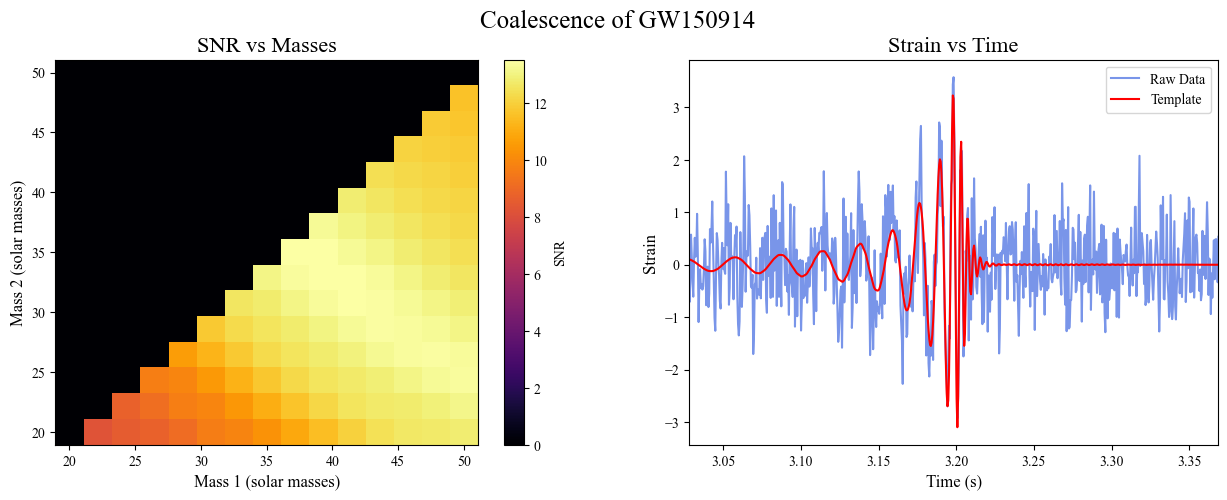

The best fit parameters for merger GW150914 for distance, time, and phase are 1135.25 ± 82.47 Mpc, 3.19797 ± 0.00019 s, and 4.603e-17 ± 0.1572 radians respectively.
--------------------------------------------------------------------------------------------------
The Binary Black Hole merger event GW151012
The best fit masses for GW151012 are 40.00 and 10.00 (In units of solar masses).


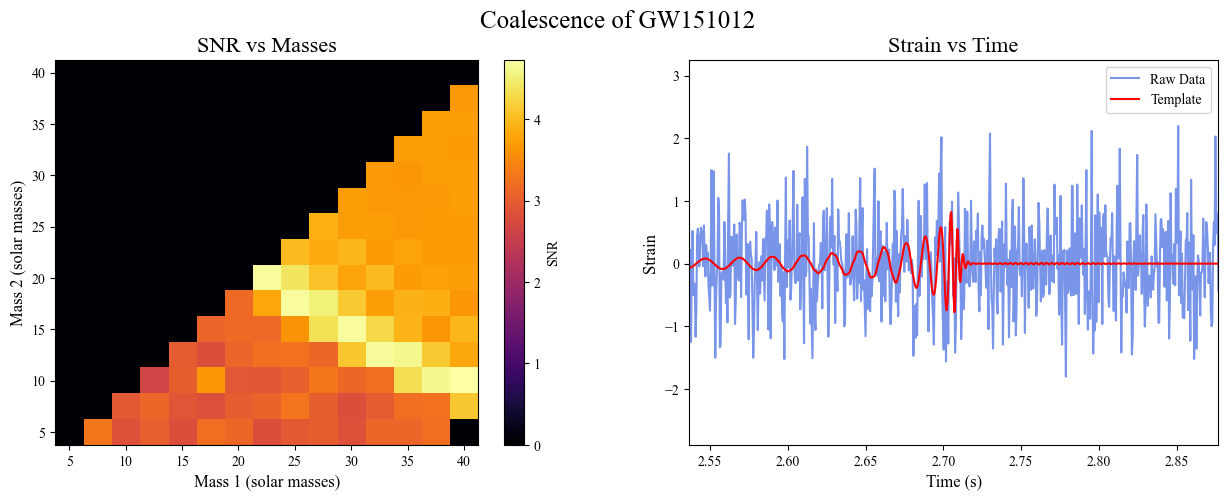

The best fit parameters for merger GW151012 for distance, time, and phase are 1896.40 ± 457.78 Mpc, 2.70506 ± 0.00058 s, and 9.035e-12 ± 0.4542 radians respectively.
--------------------------------------------------------------------------------------------------
The Binary Black Hole merger event GW151226
The best fit masses for GW151226 are 11.50 and 10.29 (In units of solar masses).


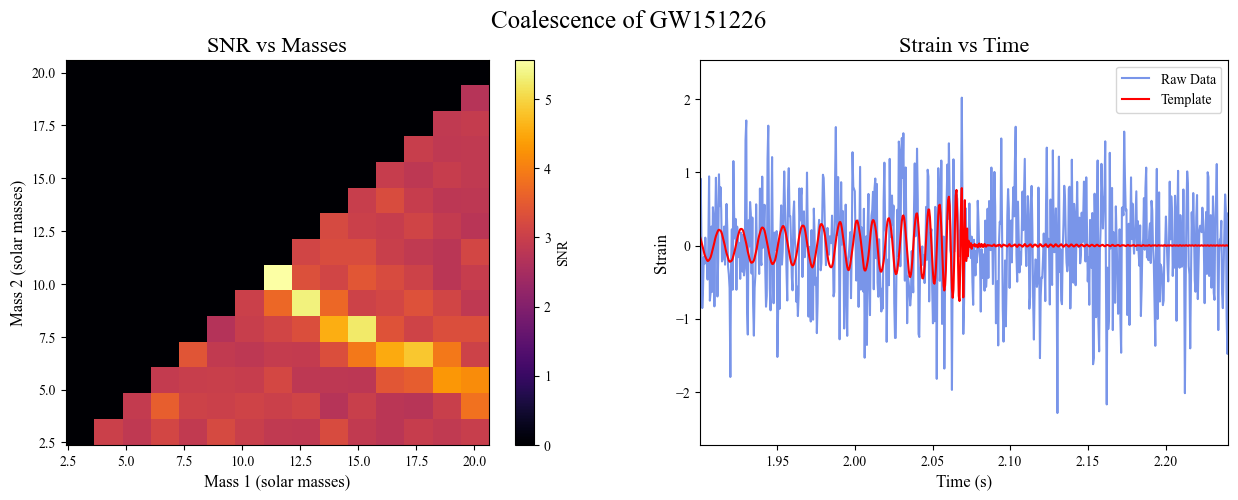

The best fit parameters for merger GW151226 for distance, time, and phase are 1007.53 ± 169.76 Mpc, 2.07013 ± 0.00025 s, and 2.565 ± 0.2539 radians respectively.
--------------------------------------------------------------------------------------------------
The Binary Black Hole merger event GW170104
The best fit masses for GW170104 are 41.43 and 21.43 (In units of solar masses).


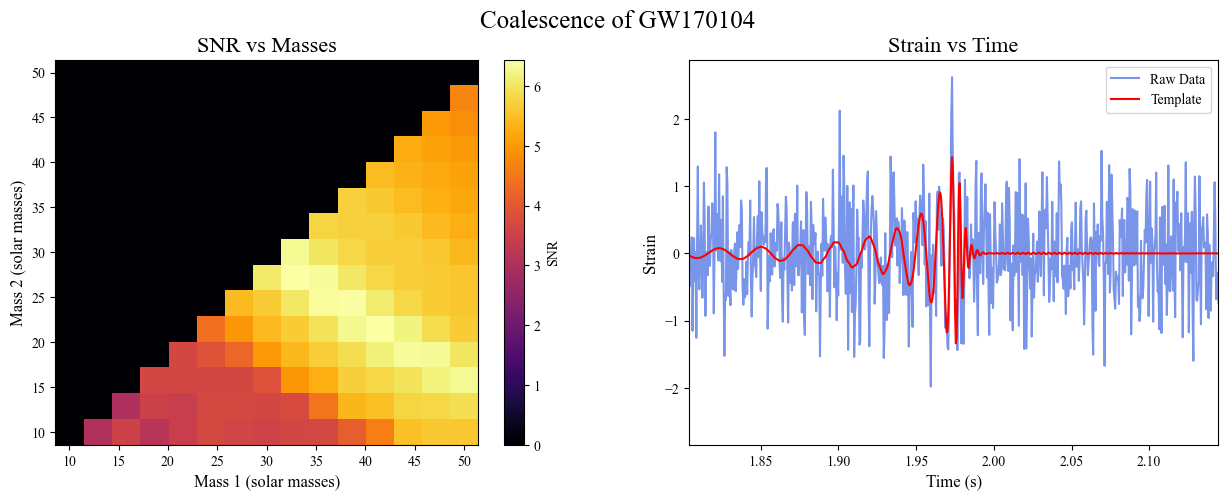

The best fit parameters for merger GW170104 for distance, time, and phase are 2030.08 ± 327.03 Mpc, 1.97397 ± 0.00039 s, and 2.099 ± 0.3287 radians respectively.
--------------------------------------------------------------------------------------------------
The Binary Black Hole merger event GW170608
The best fit masses for GW170608 are 11.00 and 8.43 (In units of solar masses).


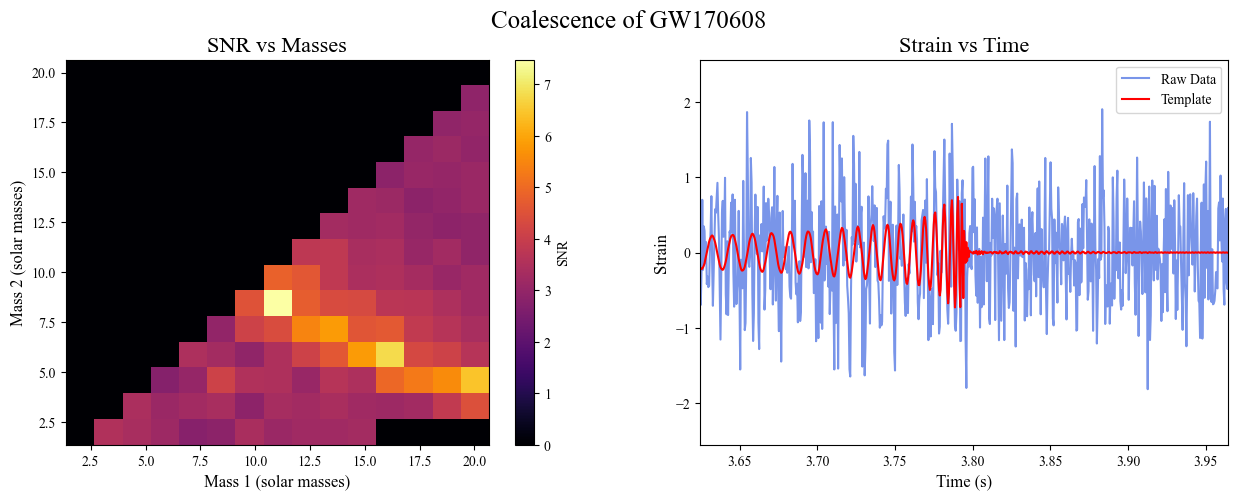

The best fit parameters for merger GW170608 for distance, time, and phase are 907.84 ± 151.63 Mpc, 3.79386 ± 0.00025 s, and 4.749e-10 ± 0.2492 radians respectively.
--------------------------------------------------------------------------------------------------
The Binary Black Hole merger event GW170729
The best fit masses for GW170729 are 75.71 and 28.57 (In units of solar masses).


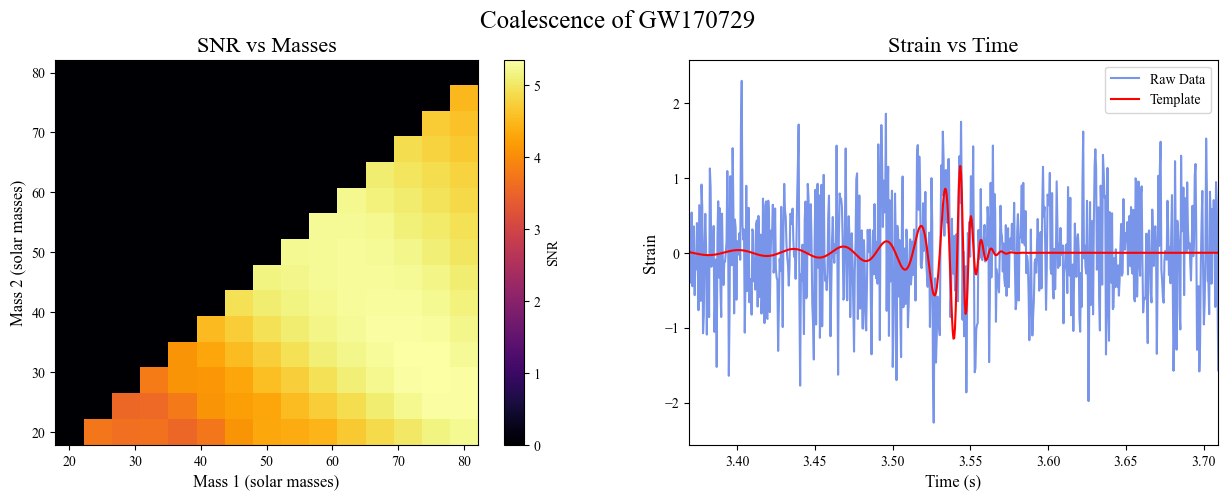

The best fit parameters for merger GW170729 for distance, time, and phase are 3067.00 ± 574.54 Mpc, 3.53897 ± 0.00081 s, and 3.205 ± 0.5112 radians respectively.
--------------------------------------------------------------------------------------------------
The Binary Black Hole merger event GW170809
The best fit masses for GW170809 are 44.29 and 15.71 (In units of solar masses).


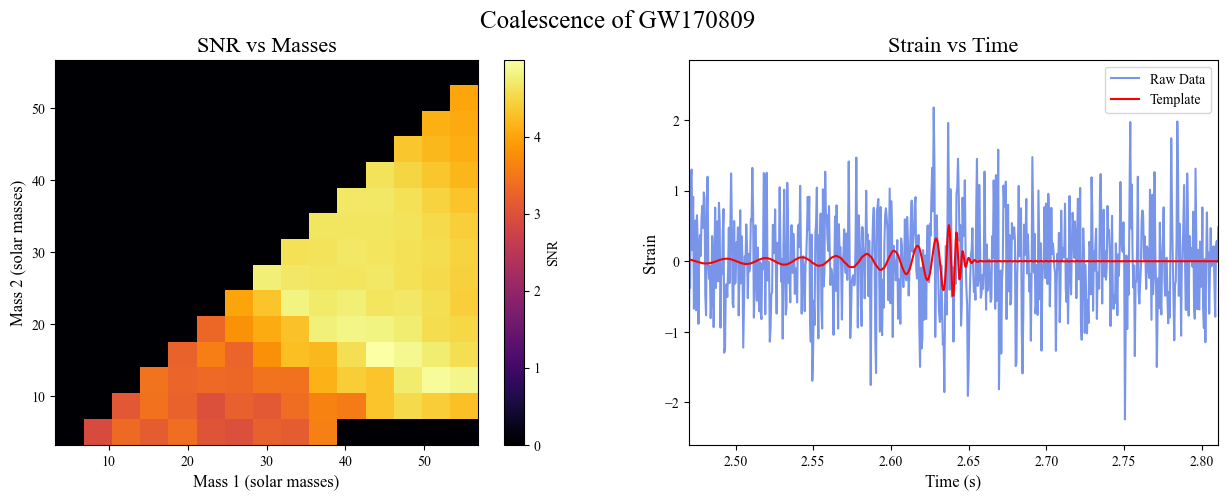

The best fit parameters for merger GW170809 for distance, time, and phase are 4500.00 ± 1914.31 Mpc, 2.63736 ± 0.00106 s, and 1.5e-07 ± 0.854 radians respectively.
--------------------------------------------------------------------------------------------------
The Binary Black Hole merger event GW170814
The best fit masses for GW170814 are 32.50 and 27.50 (In units of solar masses).


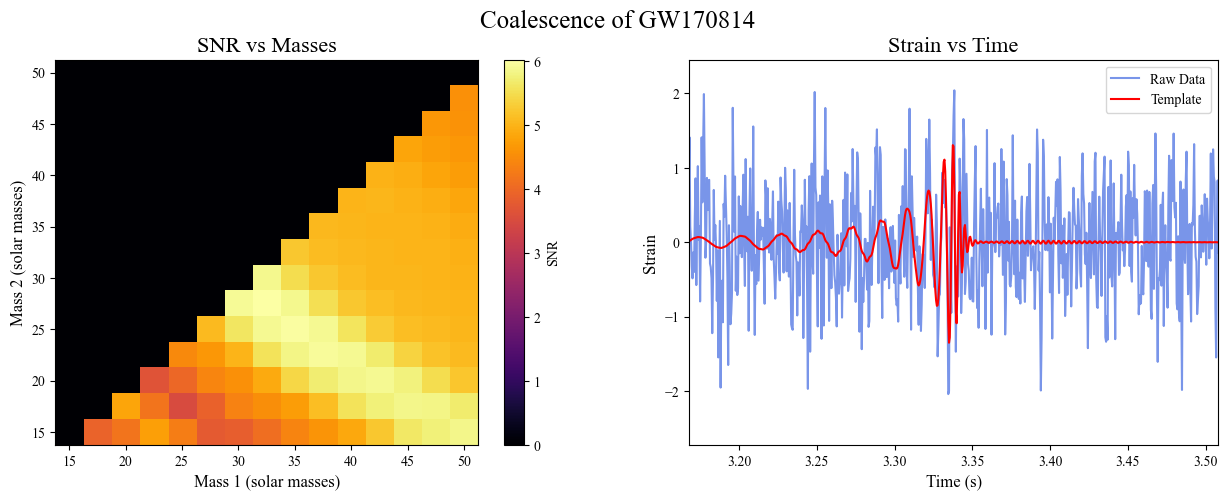

The best fit parameters for merger GW170814 for distance, time, and phase are 2224.94 ± 373.25 Mpc, 3.33786 ± 0.00038 s, and 1.514e-10 ± 0.3338 radians respectively.
--------------------------------------------------------------------------------------------------
The Binary Black Hole merger event GW170817
--------------------------------------------------------------------------------------------------
The Binary Black Hole merger event GW170818
The best fit masses for GW170818 are 27.43 and 15.21 (In units of solar masses).


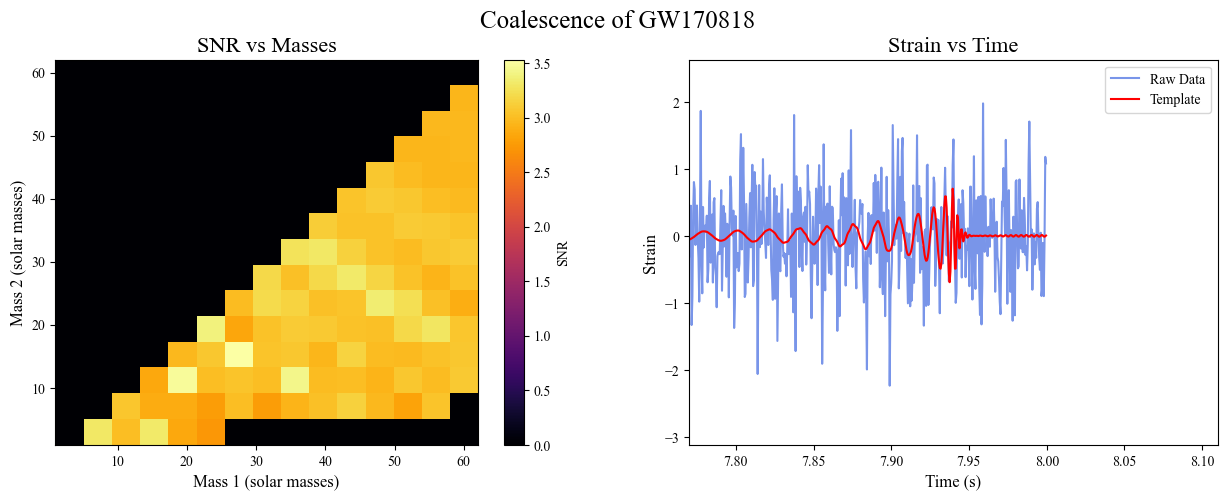

The best fit parameters for merger GW170818 for distance, time, and phase are 2743.65 ± 807.21 Mpc, 7.93948 ± 0.00058 s, and 2.611e-15 ± 0.5171 radians respectively.
--------------------------------------------------------------------------------------------------
The Binary Black Hole merger event GW170823
The best fit masses for GW170823 are 50.00 and 30.00 (In units of solar masses).


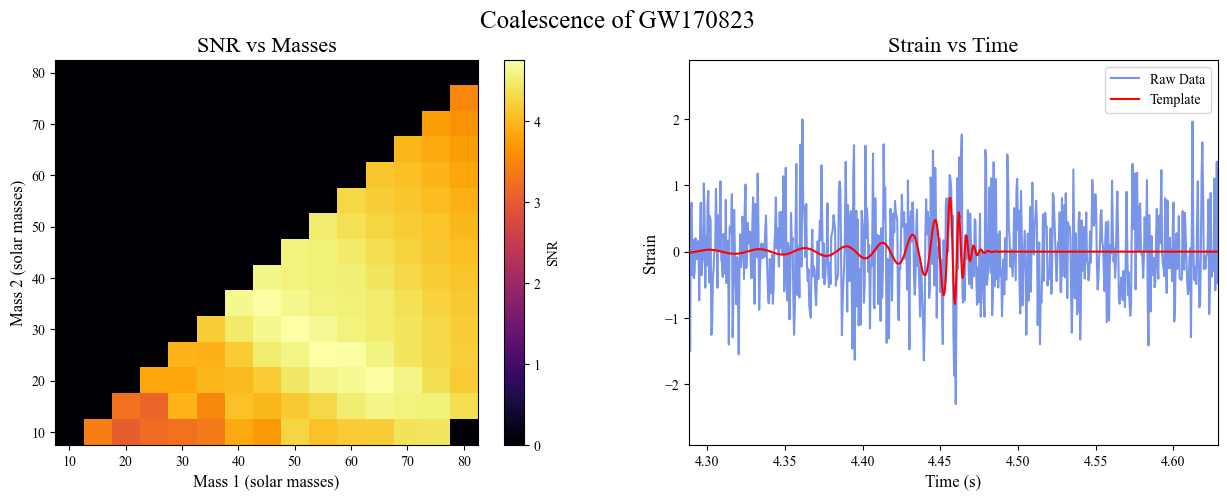

The best fit parameters for merger GW170823 for distance, time, and phase are 4500.00 ± 1268.32 Mpc, 4.45630 ± 0.00085 s, and 1.279e-08 ± 0.6499 radians respectively.


In [72]:
path = 'strain_data/'
files = np.sort(os.listdir(path))

distance_coel = [] 
time_coel = []
phase_coel = [] 
larger_masses = []
smaller_masses = []
names = []
dist_err = []
time_err = []
phase_err = []


i = 0
j = 0

for file in files:
    filename = path+file
    print('--------------------------------------------------------------------------------------------------')
    print(f'The Binary Black Hole merger event {file.replace("_strain.txt","")}')
    if file.startswith('GW170817'):
        pass
    else:
        names.append(file)
        if file.endswith('strain.txt'):
            data = np.loadtxt(filename)
            time = data[:,0]
            strain = data[:,1] 
        for data in os.listdir('inv_psd/'):
            if data.endswith('inv_psd.txt'):
                inv_psd_data = np.loadtxt('inv_psd/'+ data)
                inv_psd2 = inv_psd_data[:,1]
        t, template = gw.make_template(37,36,2048,8,inv_psd2,400)
        snr_ts = gw.get_snr(strain, template, 2048)
        min_time = time[np.where(np.max(snr_ts) == snr_ts)]-0.05
        max_time = time[np.where(np.max(snr_ts) == snr_ts)]+0.05

        masses = np.linspace(2,80,10)
        currentmax = 0
        highest_snr = [[0 for x in range(13)] for y in range(13)]
        mass1 = [] 
        mass2 = [] 
        allsnr = []

        for m1 in masses:
            for m2 in masses:
                if m1>m2 and (m1/m2) < 8:
                    t, template = gw.make_template(m1,m2,2048,8,inv_psd2)
                    snr_ts = gw.get_snr(strain, template, 2048)
                    maxsnr = np.max(snr_ts)
                    allsnr.append(maxsnr)
                    if maxsnr > currentmax:
                        currentmax = maxsnr
                        M1 = m1
                        M2 = m2
                else:
                    allsnr.append(0)
        reshaped = (np.reshape(allsnr, (10,10)).T)

        set_mass1 = [50, 40, 20, 50, 20, 80, 55, 50, 60, 80]
        set_mass2 = [20, 5, 3, 10, 2, 20, 5, 15, 3, 10]
        masses2 = []
        masses2 = np.linspace(set_mass1[i],set_mass2[j],15)
        i = i + 1
        j = j + 1
        allsnr2 = []
        currentmax = 0

        maxsnr = []
        for m1 in masses2:
            for m2 in masses2:
                if m1>m2 and (m1/m2) < 8:
                    t, template = gw.make_template(m1,m2,2048,8,inv_psd2,400)
                    snr_ts = gw.get_snr(strain, template, 2048)
                    maxsnr = np.max(snr_ts)
                    allsnr2.append(maxsnr)
                    if maxsnr > currentmax:
                        currentmax = maxsnr
                        M1 = m1
                        M2 = m2
                else:
                    allsnr2.append(0)
        reshaped = (np.reshape(allsnr2, (15,15)).T)

        mass1 = M1
        mass2 = M2
        m1 = M1
        m2 = M2
        t, template = gw.make_template(m1,m2,2048,8,inv_psd2)

        snr_ts = gw.get_snr(strain, template, 2048)
        min_time = time[np.where(np.max(snr_ts) == snr_ts)]-0.05
        max_time = time[np.where(np.max(snr_ts) == snr_ts)]+0.05
        snr_ts = gw.get_snr(strain,template,2048)

        def make_signal(t,d,tc,phic):
            _,signal = gw.make_template(M1,M2,2048,8,inv_psd,d=d,tc=tc,phic=phic)
            return signal

        t = 8
        distances = np.array(np.linspace(100,10000,10000))
        tc_min = min_time
        tc_max = max_time
        phic_min = 0
        phic_max = 2*np.pi
        d_min = 100
        d_max = 4500

        print(f'The best fit masses for {file.replace("_strain.txt","")} are {M1:2.2f} and {M2:2.2f} (In units of solar masses).')

        ht_err = np.array(np.ones(strain.size))
        b = np.array([[d_min,tc_min,phic_min],[d_max,tc_max,phic_max]], dtype = object)
        t_est = time[np.argmax(snr_ts)]
        p0 = [1000,t_est,0.5]
        popt, pcov = curve_fit(make_signal,time ,strain, p0 = [1000,time[(np.where(np.max(snr_ts) == snr_ts),)],0.5],bounds = b, sigma=ht_err, absolute_sigma=True)
        err = np.sqrt(np.diag(pcov))

        distance_coel.append(popt[0])
        time_coel.append(popt[1])
        phase_coel.append(popt[2])
        larger_masses.append(M1)
        smaller_masses.append(M2)
        dist_err.append(err[0])
        time_err.append(err[1])
        phase_err.append(err[2])


        t, template = gw.make_template(m1,m2,2048,8,inv_psd2,d = popt[0],tc = popt[1],phic = popt[2])
        lims = [tc_min-0.12, tc_max+0.12]

        plt.figure(figsize=(15,5))
        plt.suptitle(f'Coalescence of {file.replace("_strain.txt","")}', fontsize=all_title)
        plt.subplot(1,2,1)
        plt.title('SNR vs Masses', fontsize=title_size)
        plt.xlabel('Mass 1 (solar masses)', fontsize=axis_size)
        plt.ylabel('Mass 2 (solar masses)', fontsize=axis_size)
        plt.pcolor(masses2, masses2, reshaped, cmap='inferno')
        plt.colorbar(label='SNR', )


        plt.subplot(1,2,2)
        plt.plot(time, strain, label='Raw Data',color = 'royalblue', alpha = 0.7)
        plt.plot(t, template, label='Template', color = 'red')
        plt.xlabel('Time (s)', fontsize=axis_size)
        plt.xlim(lims[0], lims[1])
        plt.ylabel('Strain', fontsize=axis_size)
        plt.title('Strain vs Time', fontsize=title_size)
        plt.legend()
        plt.show()

        print(f'The best fit parameters for merger {file.replace("_strain.txt","")} for distance, time, and phase are {popt[0]:3.2f} ± {err[0]:3.2f} Mpc, {popt[1]:4.5f} ± {err[1]:4.5f} s, and {popt[2]:4.4g} ± {err[2]:4.4g} radians respectively.')



In [78]:

# for i in names:
#     i = i.replace('_strain.txt','')
# names = (names).replace('_strain.txt','')
distance_coel = np.round(distance_coel,2)
dist_err = np.round(dist_err,2)
time_coel = np.round(time_coel,3)
time_err = np.round(time_err,3)
phase_coel = np.round(phase_coel,2)
phase_err = np.round(phase_err,2)
larger_masses = np.round(larger_masses,2)
smaller_masses = np.round(smaller_masses,2)


df = pd.DataFrame({'file':names,'Distance (Mpc)':distance_coel, 'Distance Error (±)':dist_err, 'Time (s)':time_coel, 'Time Error (±):':time_err, 'Phase (radians)':phase_coel,'Phasee Error (±)':phase_err, 'Larger Mass (solar masses)':larger_masses, 'Smaller Mass (solar masses)':smaller_masses})
df.to_csv('coel_data.csv')
df



,file,Distance (Mpc),Distance Error (±),Time (s),Time Error (±):,Phase (radians),Phasee Error (±),Larger Mass (solar masses),Smaller Mass (solar masses)
0,GW150914_strain.txt,1135.25,82.47,3.198,0.000,0.00,0.16,37.14,35.00
1,GW151012_strain.txt,1896.40,457.78,2.705,0.001,0.00,0.45,40.00,10.00
2,GW151226_strain.txt,1007.53,169.76,2.070,0.000,2.56,0.25,11.50,10.29
3,GW170104_strain.txt,2030.08,327.03,1.974,0.000,2.10,0.33,41.43,21.43
4,GW170608_strain.txt,907.84,151.63,3.794,0.000,0.00,0.25,11.00,8.43
5,GW170729_strain.txt,3067.00,574.54,3.539,0.001,3.21,0.51,75.71,28.57
6,GW170809_strain.txt,4500.00,1914.31,2.637,0.001,0.00,0.85,44.29,15.71
7,GW170814_strain.txt,2224.94,373.25,3.338,0.000,0.00,0.33,32.50,27.50
8,GW170818_strain.txt,2743.65,807.21,7.940,0.001,0.00,0.52,27.43,15.21
9,GW170823_strain.txt,4500.00,1268.32,4.456,0.001,0.00,0.65,50.00,30.00


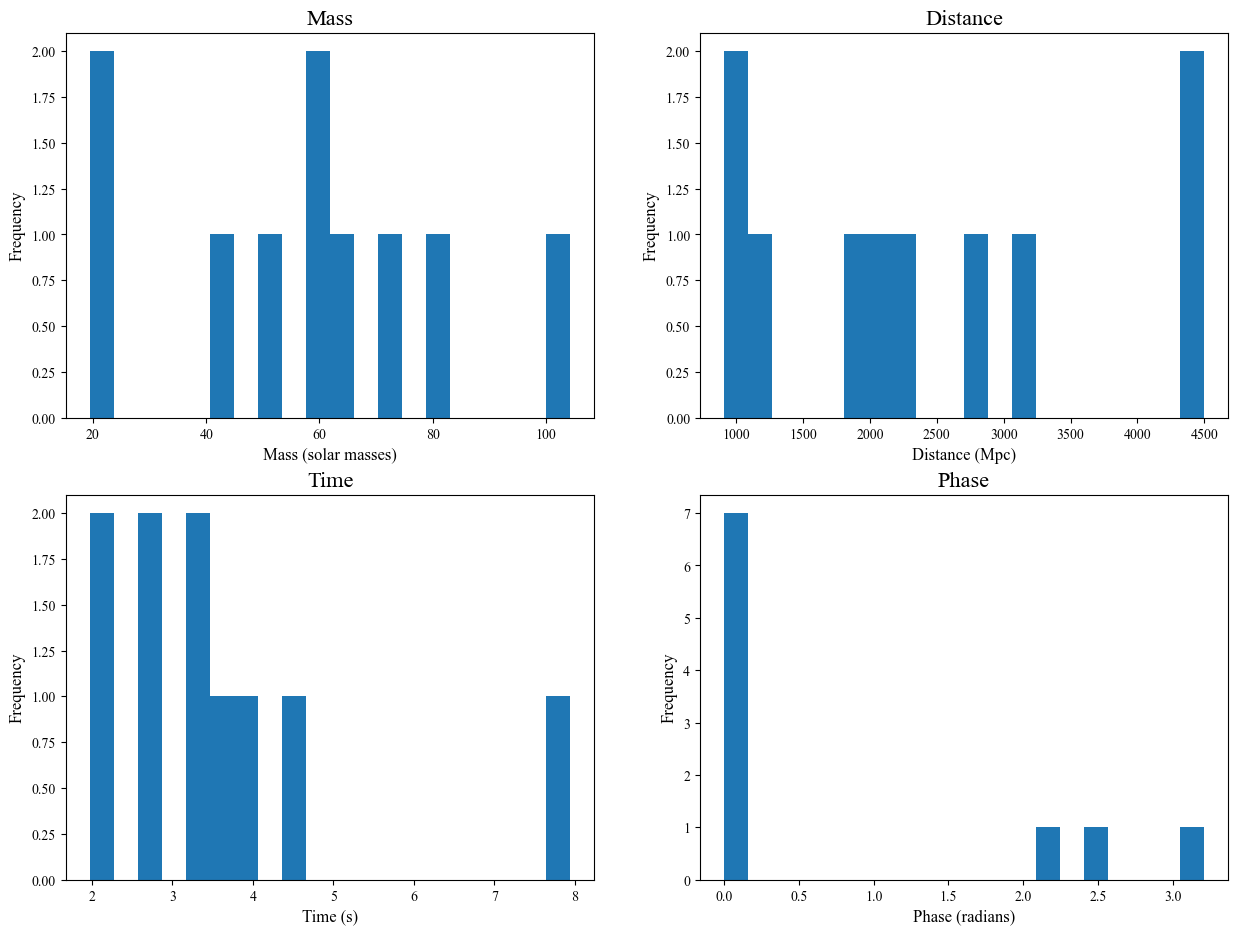

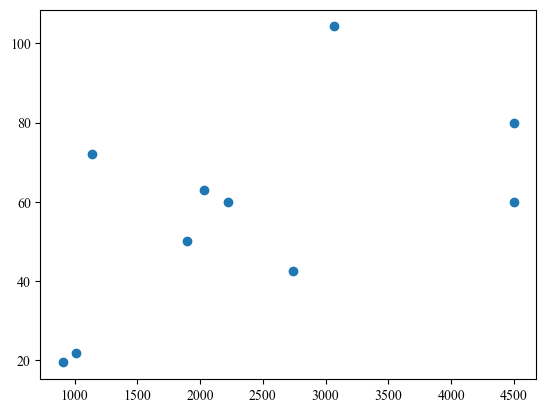

In [79]:
all_masses = np.array(larger_masses) + np.array(smaller_masses)
sort_all_masses = np.sort(all_masses)

plt.figure(figsize = (15,11))
plt.subplot(2,2,1)
plt.hist(all_masses, bins=20)
plt.xlabel('Mass (solar masses)', fontsize=axis_size)
plt.ylabel('Frequency', fontsize=axis_size)
plt.title('Mass', fontsize=title_size)

plt.subplot(2,2,3)
plt.hist(time_coel, bins=20)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('Frequency', fontsize=axis_size)
plt.title('Time', fontsize=title_size)

plt.subplot(2,2,2)
plt.hist(distance_coel, bins=20)
plt.xlabel('Distance (Mpc)', fontsize=axis_size)
plt.ylabel('Frequency', fontsize=axis_size)
plt.title('Distance', fontsize=title_size)

plt.subplot(2,2,4)
plt.hist(phase_coel, bins=20)
plt.xlabel('Phase (radians)', fontsize=axis_size)
plt.ylabel('Frequency', fontsize=axis_size)
plt.title('Phase', fontsize=title_size)
plt.show()

plt.figure()
plt.scatter(distance_coel,all_masses)
plt.show()

